In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2:].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

/Users/zohebabai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
#Fitting SVR
from sklearn.svm import SVR
reg = SVR(kernel= 'rbf')
reg.fit(x,y)

/Users/zohebabai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

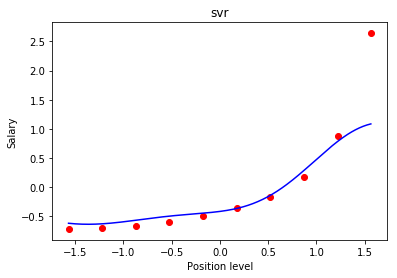

In [6]:
#Visualising the SVR results with smoother curve
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid, reg.predict(x_grid), color='blue')
plt.title('svr')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [7]:
#predicting new results. using scaled feature
y_pred = reg.predict(sc_x.transform(6.5))
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])